<div class="alert alert-block alert-info">


<span style="color: black">
    
# E-Commerce Analysis Project. 

   ### By: Ahmad Obeid & Sami Imran
    
</span>
</div>


***

    
![](ecommerce_analytics_.jpg)
   

<div class="alert alert-block alert-success">
    
<span style="color: black">

## Table Of Contents:
---

<ol>
    <li><b> Data Cleaning</b></li>
    <li><b> EDA </b></li>
    <li><b> Product Analysis</b></li>
    <li><b> RFM Analysis & Customer Segmentation</b></li>
</ol>
</span>

</div>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as dt
import warnings
from sklearn.cluster import KMeans
import nltk

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

import missingno as msno
import pandas_profiling

import gc

%matplotlib inline
color = sns.color_palette()

In [2]:
df = pd.read_csv('eshop.csv', encoding = 'ISO-8859-1')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


<div class="alert alert-block alert-info">
<span style="color:black"> 
    
   # Data Cleaning

</span>
</div>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


<div class="alert alert-block alert-success">
<span style="color:black"> 
    
### Note: 
---
* There are missing values from customerID and Description:
    * Description missing: 1454 values
    * CustomerID missing:  135080 values.
</span>

</b>

</div>

In [5]:
# check missing values for each column 
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64

In [6]:
# check out the rows with missing values
df[df.isnull().any(axis=1)].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


<div class="alert alert-block alert-success">
<span style="color:black"> 
    
Since the missing values are only in the CustomerID column and the description column, we could try to look at the InvoiceNo and see if maybe we can find the CustomerID
</span>

</b>

</div>


In [7]:
df[df['InvoiceNo']== '536414']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom


In [8]:
df[df['InvoiceNo']== '536544']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,12/1/2010 14:32,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,12/1/2010 14:32,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,12/1/2010 14:32,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,12/1/2010 14:32,0.43,NaN,United Kingdom
1452,536544,21809,CHRISTMAS HANGING TREE WITH BELL,1,12/1/2010 14:32,2.51,NaN,United Kingdom


<div class="alert alert-block alert-success">
<span style="color:black"> 
    
It appears that we can't replace the missing values and we can't keep data without the value in the customer id columns since we want to classify the customers. So we'll drop the lines with missing values on the customerID column.
</span>

</b>

</div>

In [9]:
df = df.dropna(subset=["CustomerID"])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      406829 non-null object
StockCode      406829 non-null object
Description    406829 non-null object
Quantity       406829 non-null int64
InvoiceDate    406829 non-null object
UnitPrice      406829 non-null float64
CustomerID     406829 non-null float64
Country        406829 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


<div class="alert alert-block alert-success">
<span style="color:black"> 
    
#### After removing null values, making another check for null values if we missed.
</span>

</b>

</div>

In [11]:
df.isnull().sum().sort_values()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

<div class="alert alert-block alert-success">
<span style="color:black"> 
    
### There are no more missing values. We'll now check the dupplicate values and drop them if there's any.
</span>

</b>

</div>

In [12]:
print('Dupplicate entries: {}'.format(df.duplicated().sum()))
df.drop_duplicates(inplace = True)

Dupplicate entries: 5225


<div class="alert alert-block alert-success">
<span style="color:black"> 
    
### As you can see we found 5225 duplicate rows, so we got rid of them. 
</span>

</b>

</div>


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      401604 non-null object
StockCode      401604 non-null object
Description    401604 non-null object
Quantity       401604 non-null int64
InvoiceDate    401604 non-null object
UnitPrice      401604 non-null float64
CustomerID     401604 non-null float64
Country        401604 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 27.6+ MB


<div class="alert alert-block alert-success">
<span style="color:black"> 
    
### change description from UPPER case to LOWER case
</span>

</b>

</div>

In [14]:
df['Description'] = df.Description.str.lower()

<div class="alert alert-block alert-success">
<span style="color:black"> 
    
### change column customerID type from Float to Int type
</span>

</b>

</div>

In [15]:
df['CustomerID'] = df['CustomerID'].astype('int64')

In [16]:
df.describe().round(1)

,Quantity,UnitPrice,CustomerID
count,401604.0,401604.0,401604.0
mean,12.2,3.5,15281.2
std,250.3,69.8,1714.0
min,-80995.0,0.0,12346.0
25%,2.0,1.2,13939.0
50%,5.0,2.0,15145.0
75%,12.0,3.8,16784.0
max,80995.0,38970.0,18287.0


<div class="alert alert-block alert-success">
<span style="color:black"> 
    
### NOTE: Quantity column min value is negative, so we must remove the negative values.

</span>

</b>

</div>

In [17]:
df = df[df.Quantity > 0]

In [18]:
df.describe().round(1)

,Quantity,UnitPrice,CustomerID
count,392732.0,392732.0,392732.0
mean,13.2,3.1,15287.7
std,181.6,22.2,1713.6
min,1.0,0.0,12346.0
25%,2.0,1.2,13955.0
50%,6.0,2.0,15150.0
75%,12.0,3.8,16791.0
max,80995.0,8142.8,18287.0


<div class="alert alert-block alert-success">
<span style="color:black"> 
    
### Cleaned from negative values!

</span>

</b>

</div>

In [19]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,white metal lantern,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,12/1/2010 8:26,3.39,17850,United Kingdom


<div class="alert alert-block alert-success">
<span style="color:black"> 
    
### Add column for Revenues

</span>

</b>

</div>



In [20]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']

In [21]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,white hanging heart t-light holder,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,white metal lantern,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34


<div class="alert alert-block alert-info">
<span style="color:black"> 
    
   # EDA

</span>
</div>

<div class="alert alert-block alert-success">
<span style="color:black"> 
    
## Asking questions about the Data...
#### How Many Orders Made by the Customers?

</span>

</b>

</div>

In [67]:
orders=df.groupby(by=['CustomerID','Country'],as_index=False)['InvoiceNo'].count()
orders[:10]

,CustomerID,Country,InvoiceNo
0,12346,United Kingdom,1
1,12347,Iceland,182
2,12348,Finland,31
3,12349,Italy,73
4,12350,Norway,17
5,12352,Norway,85
6,12353,Bahrain,4
7,12354,Spain,58
8,12355,Bahrain,13
9,12356,Portugal,59


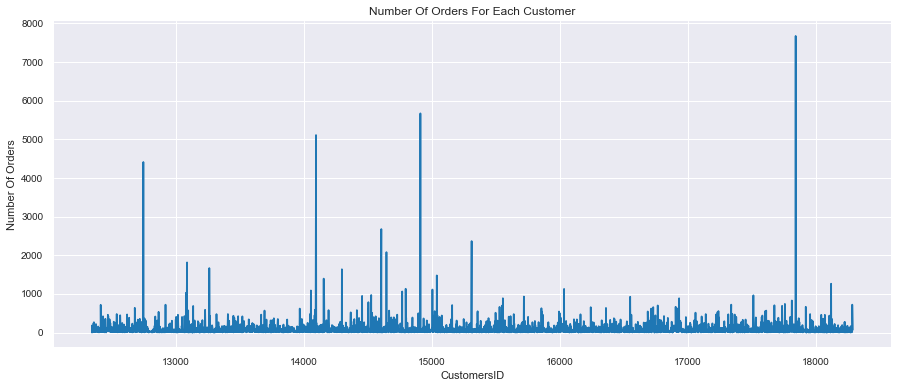

In [23]:
plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID,orders.InvoiceNo)
plt.xlabel('CustomersID')
plt.ylabel('Number Of Orders')
plt.title('Number Of Orders For Each Customer')
plt.show()

<div class="alert alert-block alert-success">
<span style="color:black"> 
    
### The top 5 customers with the most orders

</span>

</b>

</div>

In [68]:
orders.sort_values(by='InvoiceNo',ascending=False).head()

,CustomerID,Country,InvoiceNo
4019,17841,United Kingdom,7676
1888,14911,EIRE,5672
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4413
1670,14606,United Kingdom,2677


<div class="alert alert-block alert-success">
<span style="color:black"> 
    
### How much money spent by the customers, then dispalying top  5

</span>

</b>

</div>

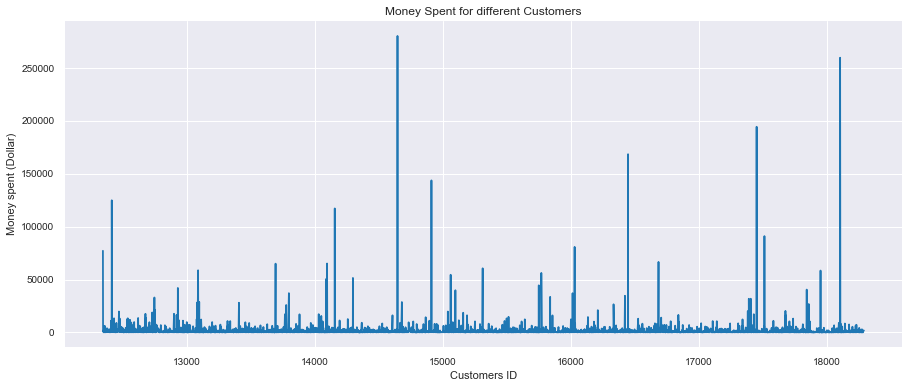

In [25]:
revenue=df.groupby(by=['CustomerID','Country'],as_index=False)['Revenue'].sum()
plt.subplots(figsize=(15,6))
plt.plot(revenue.CustomerID, revenue.Revenue)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

In [26]:
print('The most 5 custmoers with most money spent')
revenue.sort_values(by='Revenue', ascending=False).head()

The most 5 custmoers with most money spent


,CustomerID,Country,Revenue
1698,14646,Netherlands,280206.02
4210,18102,United Kingdom,259657.30
3737,17450,United Kingdom,194390.79
3017,16446,United Kingdom,168472.50
1888,14911,EIRE,143711.17


<div class="alert alert-block alert-success">
<span style="color:black"> 
    
#### Add Day,Month and Hour columns for invoice, so we can make analysis through the time(months,days & hours)

</span>

</b>

</div>

In [27]:
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate, format='%m/%d/%Y %H:%M')
df.insert(loc=2, column='year_month', value=df['InvoiceDate'].map(lambda x: 100*x.year + x.month))
df.insert(loc=3, column='month', value=df.InvoiceDate.dt.month)

df.insert(loc=4, column='day', value=(df.InvoiceDate.dt.dayofweek)+1)
df.insert(loc=5, column='hour', value=df.InvoiceDate.dt.hour)

<div class="alert alert-block alert-success">
<span style="color:black"> 
    
#### Note: The week starts on Monday!

</span>

</b>

</div>


<div class="alert alert-block alert-success">
<span style="color:black"> 

## The chart below show number of orders during the months

</span>

</b>

</div>## the chart below show number of orders during the months

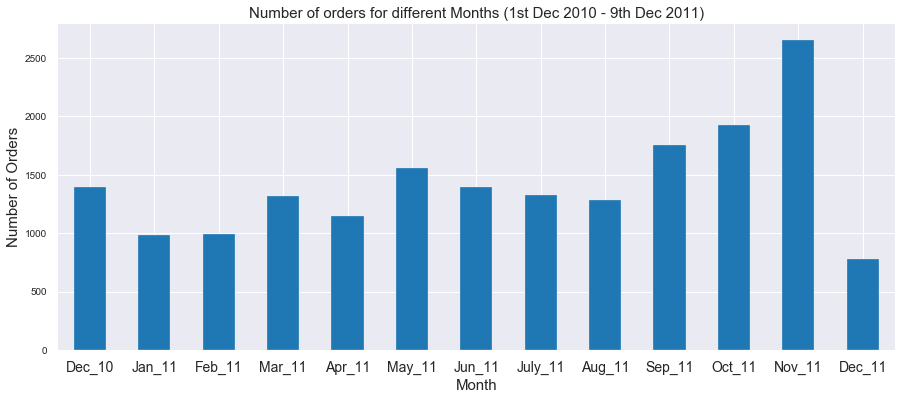

In [69]:
ax = df.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index().plot('bar',color=color[0],figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=14)
plt.show()

<div class="alert alert-block alert-success">
<span style="color:black"> 

### Calculating number of orders per days, as you will see day 6 (saturday) no orders.

</span>

</b>

</div>

In [29]:
df.groupby('InvoiceNo')['day'].unique().value_counts().sort_index()

[1]    2863
[2]    3185
[3]    3455
[4]    4033
[5]    2831
[7]    2169
Name: day, dtype: int64

<div class="alert alert-block alert-success">
<span style="color:black"> 

### The chart below shows the number of orders per days


</span>

</b>

</div>

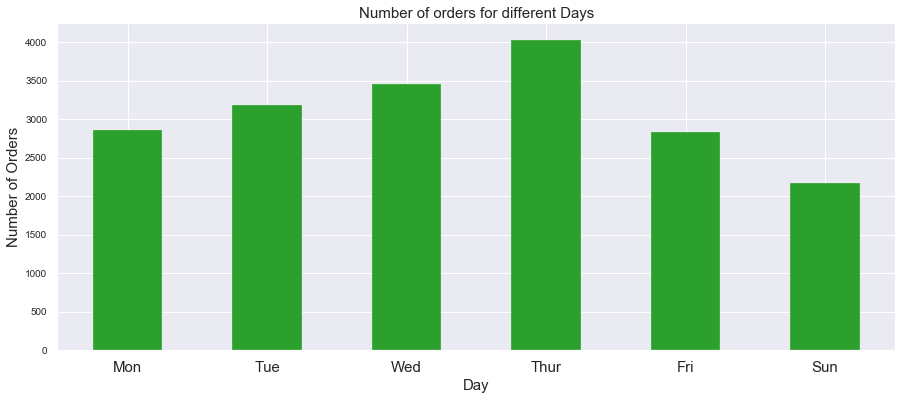

In [30]:
ax = df.groupby('InvoiceNo')['day'].unique().value_counts().sort_index().plot('bar',color=color[2],figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

In [31]:
df.groupby('InvoiceNo')['hour'].unique().value_counts().iloc[:-1].sort_index()

[6]        1
[7]       29
[8]      555
[9]     1394
[10]    2226
[11]    2276
[12]    3129
[13]    2637
[14]    2275
[15]    2038
[16]    1100
[17]     544
[18]     169
[19]     144
[20]      18
Name: hour, dtype: int64

<div class="alert alert-block alert-success">
<span style="color:black"> 

Note: Above you can see number of orders in specific hours, below the chart.


</span>

</b>

</div>

<h3 style="color:gray"> at 12 o'clock orders get to the most</h3>

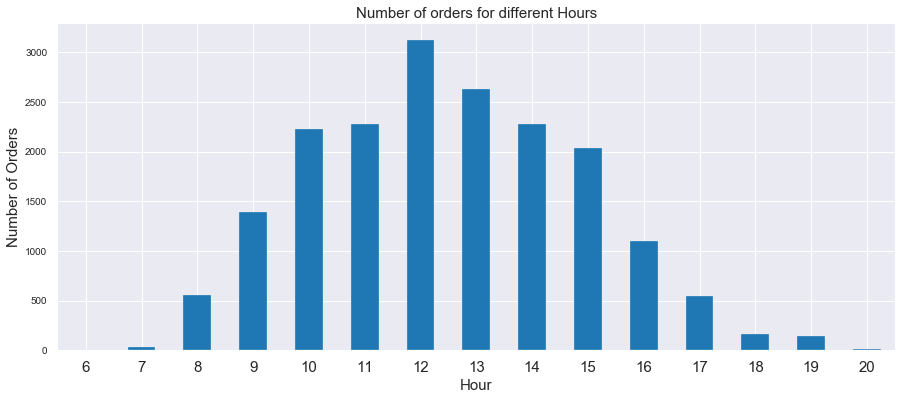

In [70]:
ax = df.groupby('InvoiceNo')['hour'].unique().value_counts().iloc[:-1].sort_index().plot('bar',color=color[0],figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Hours',fontsize=15)
ax.set_xticklabels(range(6,21), rotation='horizontal', fontsize=15)
plt.show()

In [33]:
df.UnitPrice.describe()

count    392732.000000
mean          3.125596
std          22.240725
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

<div class="alert alert-block alert-success">
<span style="color:black">
    
* We see that there are unit price = 0 (FREE items)
* There are some free items given to customers from time to time.


</span>

</b>

</div>


<div class="alert alert-block alert-success">
<span style="color:black"> 

### Extracting free items to a new data frame


</span>

</b>

</div>


In [34]:
FreeItems = df[df.UnitPrice == 0]
FreeItems.head()

,InvoiceNo,StockCode,year_month,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
9302,537197,22841,201012,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
33576,539263,22580,201012,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
40089,539722,22423,201012,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
47068,540372,22090,201101,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
47070,540372,22553,201101,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0


In [35]:
FreeItems.year_month.value_counts().sort_index()

201012     3
201101     3
201102     1
201103     2
201104     2
201105     2
201107     2
201108     6
201109     2
201110     3
201111    14
Name: year_month, dtype: int64

<div class="alert alert-block alert-success">
<span style="color:black"> 

Note: 
* Above we calculate free items for each month, below the chart. 
* On average, the company gave out 2-4 times FREE items to customers each month (Except in June 2011)


</span>

</b>

</div>

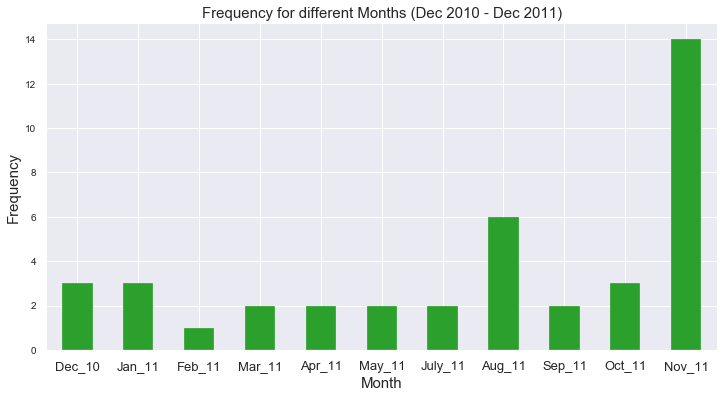

In [71]:
ax = FreeItems.year_month.value_counts().sort_index().plot('bar',figsize=(12,6), color=color[2])
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ax.set_title('Frequency for different Months (Dec 2010 - Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11'), rotation='horizontal', fontsize=13)
plt.show()

<div class="alert alert-block alert-success">
<span style="color:black"> 

### How many orders made by countries?


</span>

</b>

</div>

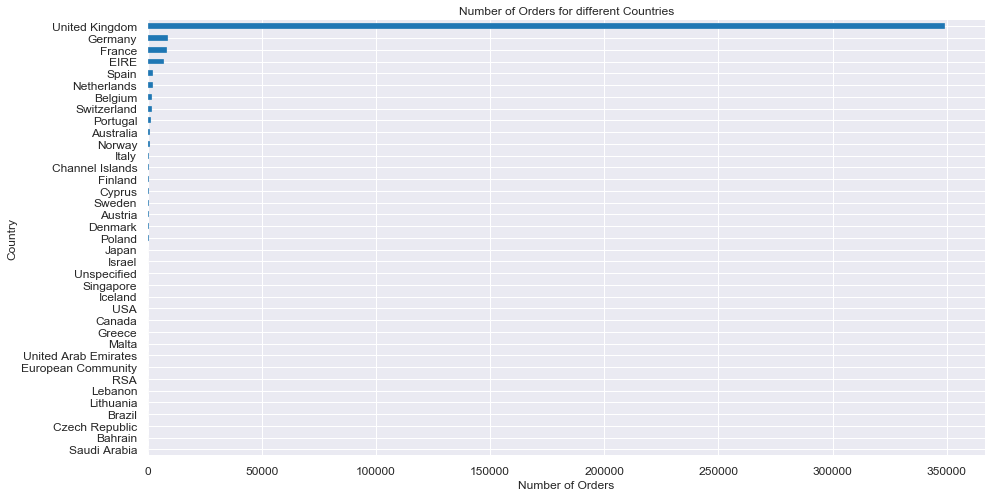

In [72]:
group_country_orders = df.groupby('Country')['InvoiceNo'].count().sort_values()
# del group_country_orders['United Kingdom']

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot('barh', fontsize=12, color=color[0])
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

<div class="alert alert-block alert-success">
<span style="color:black"> 

### As you can see UK on the top with enormous gap, so we will exclude it to see the rest countries 


</span>

</b>

</div>


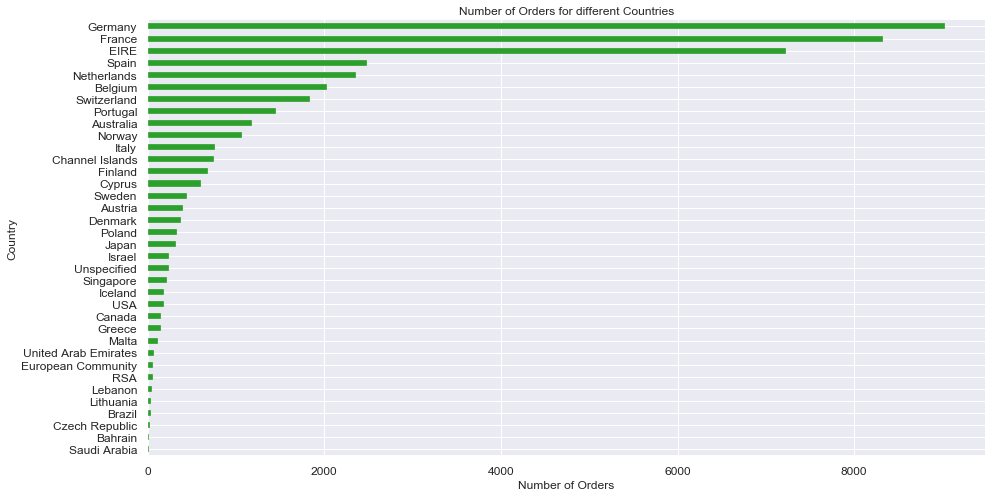

In [73]:
group_country_orders = df.groupby('Country')['InvoiceNo'].count().sort_values()
del group_country_orders['United Kingdom']

# plot number of unique customers in each country (without UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot('barh', fontsize=12, color=color[2])
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

<div class="alert alert-block alert-success">
<span style="color:black">
 
### How much money spent by countries?


</span>

</b>

</div>


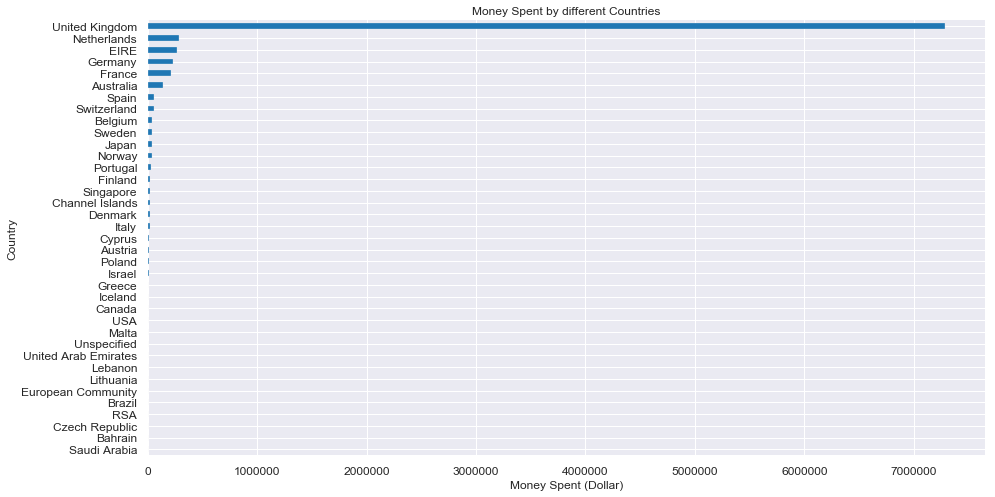

In [39]:
group_country_amount_spent = df.groupby('Country')['Revenue'].sum().sort_values()
# del group_country_orders['United Kingdom']

# plot total money spent by each country (with UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot('barh', fontsize=12, color=color[0])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

<div class="alert alert-block alert-success">
<span style="color:black">
 
### Also UK on the top with enormous gap, so we will exclude it.


</span>

</b>

</div>

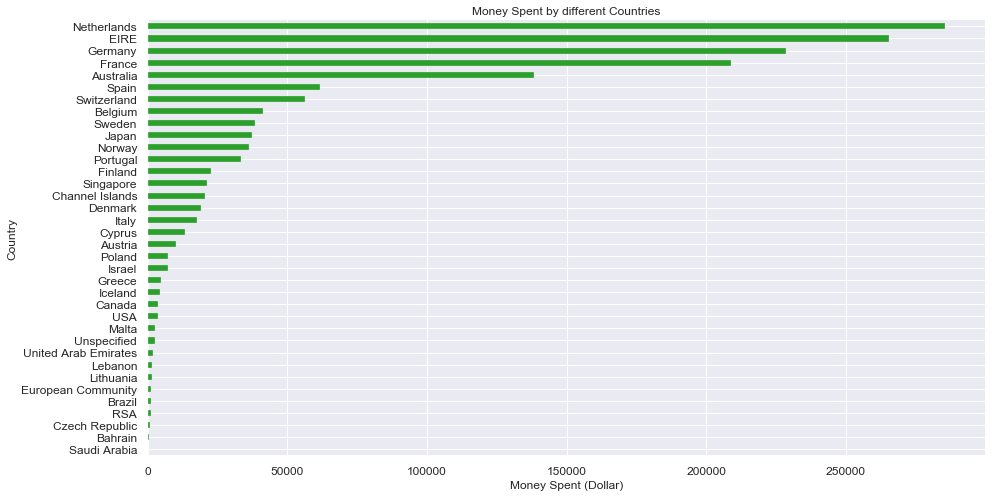

In [74]:
group_country_amount_spent = df.groupby('Country')['Revenue'].sum().sort_values()
del group_country_amount_spent['United Kingdom']

# plot total money spent by each country (without UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot('barh', fontsize=12, color=color[2])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

<div class="alert alert-block alert-success">
<span style="color:black">
 
## The Top 10 Products Sold


</span>

</b>

</div>

In [41]:
df.Description.value_counts()[:10]


white hanging heart t-light holder    2016
regency cakestand 3 tier              1714
jumbo bag red retrospot               1615
assorted colour bird ornament         1395
party bunting                         1390
lunch bag red retrospot               1303
set of 3 cake tins pantry design      1152
postage                               1099
lunch bag  black skull.               1078
pack of 72 retrospot cake cases       1050
Name: Description, dtype: int64

<div class="alert alert-block alert-success">
<span style="color:black">

<h1 style="color:blue"> Results obtained from Exploratory Data Analysis (EDA)</h1> <br>
<ol>
    <li><b>The customer with the highest number of orders comes from the United Kingdom (UK)</b></li><br>
<li><b>The customer with the highest money spent on purchases comes from Netherlands</b></li><br>
<li>The company receives the highest number of orders from customers in the UK (since it is a UK-based company). Therefore, the TOP 5 countries (including UK) that place the highest number of orders are as below:
    <ol><li><b>United Kingdom</b></li>
        <li><b>Germany</b></li>
        <li><b>France</b></li>
        <li><b>Ireland (EIRE)</b></li>
        <li><b>Spain</b></li>
    </ol><br>
<li>As the company receives the highest number of orders from customers in the UK (since it is a UK-based company), customers in the UK spend the most on their purchases. Therefore, the TOP 5 countries (including UK) that spend the most money on purchases are as below:</li>
    <ol>
        <li><b>United Kingdom</b></li>
        <li><b>Netherlands</b></li>
        <li><b>Ireland (EIRE)</b></li>
        <li><b>Germany</b></li>
        <li><b>France</b></li>
    </ol><br>    
<li><b>November 2011 has the highest sales</b></li>
    <ul>
        <li>The month with the lowest sales is undetermined as the dataset consists of transactions until 9th December 2011 in December.</li>
    </ul><br>    
<li>There are <b>no transactions on Saturday</b> between 1st Dec 2010 - 9th Dec 2011</li><br>
<li>The number of orders received by the company tends to increases from Monday to Thursday and decrese afterward</li><br>
<li>The company receives <b>the highest number of orders at 12:00pm</b></li>
    <ul>
        <li>Possibly most customers made purchases<b> during lunch hour between 12:00pm - 2:00pm</b></li>
    </ul><br>    
<li>The company<b> tends to give out FREE items for purchases occasionally each month (Except June 2011)</b></li>
    <ul>
        <li>However, it is not clear what factors contribute to giving out the FREE items to the particular customers</li>
    </ul>


</span>

</b>

</div>



<div class="alert alert-block alert-info">
<span style="color:black"> 
    
   # Product Analysis

</span>
</div>

<div class="alert alert-block alert-success">
<span style="color:black">

### Making  a function to save key words


</span>

</b>

</div>

In [43]:
is_noun = lambda pos: pos[:2] == 'NN'

def keywords_inventory(dataframe, colonne = 'Description'):
    stemmer = nltk.stem.SnowballStemmer("english")
    keywords_roots  = dict()  # collect the words / root
    keywords_select = dict()  # association: root <-> keyword
    category_keys   = []
    count_keywords  = dict()
    icount = 0
    for s in dataframe[colonne]:
        if pd.isnull(s): continue
        lines = s.lower()
        tokenized = nltk.word_tokenize(lines)
        nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 
        
        for t in nouns:
            t = t.lower() ; racine = stemmer.stem(t)
            if racine in keywords_roots:                
                keywords_roots[racine].add(t)
                count_keywords[racine] += 1                
            else:
                keywords_roots[racine] = {t}
                count_keywords[racine] = 1
    
    for s in keywords_roots.keys():
        if len(keywords_roots[s]) > 1:  
            min_length = 1000
            for k in keywords_roots[s]:
                if len(k) < min_length:
                    clef = k ; min_length = len(k)            
            category_keys.append(clef)
            keywords_select[s] = clef
        else:
            category_keys.append(list(keywords_roots[s])[0])
            keywords_select[s] = list(keywords_roots[s])[0]
                   
    print("Nb of keywords in variable '{}': {}".format(colonne,len(category_keys)))
    return category_keys, keywords_roots, keywords_select, count_keywords

<div class="alert alert-block alert-success">
<span style="color:black">

### This function takes as input the dataframe and analyzes the content of the Description column by performing the following operations:<br>
<ul>
    <li>
        extract the names (proper, common) appearing in the products description</li><br>
<li>for each name, I extract the root of the word and aggregate the set of names associated with this particular root</li><br>
<li>count the number of times each root appears in the dataframe.</li><br>
<li>when several words are listed for the same root, I consider that the keyword associated with this root is the shortest name (this systematically selects the singular when there are singular/plural variants)</li><br>
The first step of the analysis is to retrieve the list of products:

</span>

</b>

</div>


In [44]:
df_products = pd.DataFrame(df['Description'].unique()).rename(columns = {0:'Description'})


In [45]:
keywords, keywords_roots, keywords_select, count_keywords = keywords_inventory(df_products)

Nb of keywords in variable 'Description': 1478


<div class="alert alert-block alert-success">
<span style="color:black">
<b>The execution of this function returns three variables:</b>
<ol>
    <li>keywords: the list of extracted keywords.</li>
    <li>keywords_roots: a dictionary where the keys are the keywords roots and the values are the lists of words associated with those roots</li>
    <li>count_keywords: dictionary listing the number of times every word is used</li><br>
At this point, I convert the count_keywords dictionary into a list, to sort the keywords according to their occurences:

</span>

</b>

</div>

In [46]:
list_products = []
for k,v in count_keywords.items():
    list_products.append([keywords_select[k],v])
list_products.sort(key = lambda x:x[1], reverse = True)
list_products[:5]

[['heart', 267], ['vintage', 210], ['set', 206], ['pink', 188], ['bag', 164]]

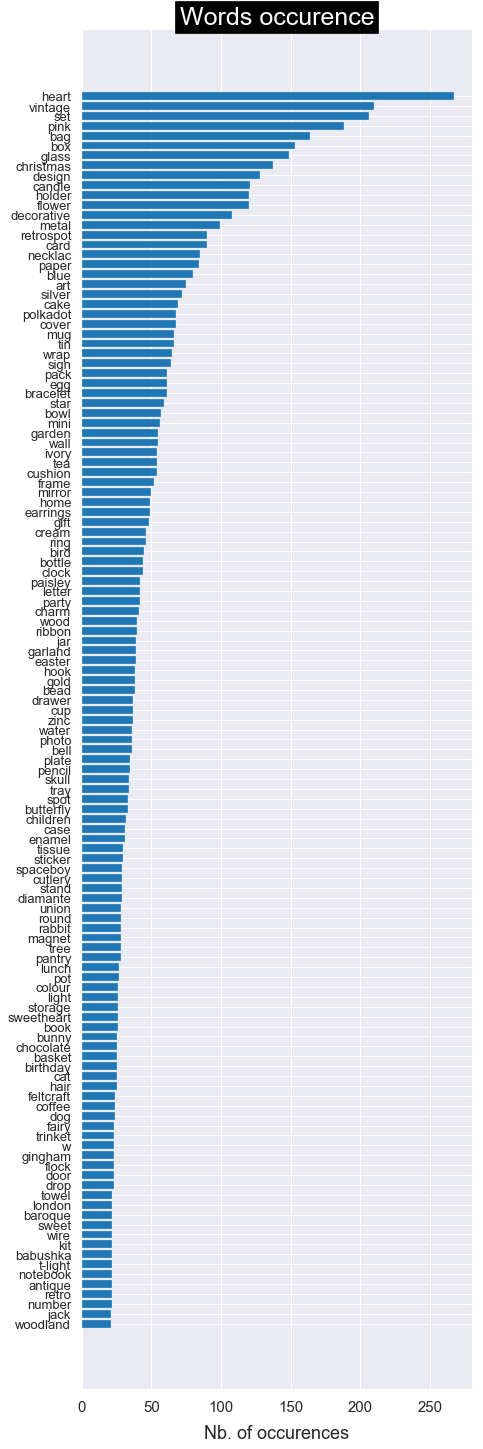

In [47]:
liste = sorted(list_products, key = lambda x:x[1], reverse = True)
#_______________________________
plt.rc('font', weight='normal')
fig, ax = plt.subplots(figsize=(7, 25))
y_axis = [i[1] for i in liste[:125]]
x_axis = [k for k,i in enumerate(liste[:125])]
x_label = [i[0] for i in liste[:125]]
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 13)
plt.yticks(x_axis, x_label)
plt.xlabel("Nb. of occurences", fontsize = 18, labelpad = 10)
ax.barh(x_axis, y_axis, align = 'center')
ax = plt.gca()
ax.invert_yaxis()
#_______________________________________________________________________________________
plt.title("Words occurence",bbox={'facecolor':'k', 'pad':5}, color='w',fontsize = 25)
plt.show()

In [48]:
list_products = []
for k,v in count_keywords.items():
    word = keywords_select[k]
    if word in ['pink', 'blue', 'tag', 'green', 'orange']: continue
    if len(word) < 3 or v < 13: continue
    if ('+' in word) or ('/' in word): continue
    list_products.append([word, v])
#______________________________________________________    
list_products.sort(key = lambda x:x[1], reverse = True)
print('words kept:', len(list_products))


words kept: 191


<div class="alert alert-block alert-info">
<span style="color:black"> 
    
   # Customer Segmentaion & RFM Analysis

</span>
</div>

<div class="alert alert-block alert-success">
<span style="color:black">

 RFM (Recency Frequency Monetary) Analysis
RFM is a method used for analyzing customer value. It is commonly used in database marketing and direct marketing and has received particular attention in retail and professional services industries

<b>RFM stands for the three dimensions:</b>
<ol>
    <li>Recency – How recently did the customer purchase?</li>
    <li>Frequency – How often do they purchase?</li>
    <li>Monetary Value – How much do they spend?</li>
</ol>
Before starting RFM analysis we need to set objective and outcome of analysis,<b> for this example goal is to define class of customer example - Platinum, Gold and Silver.</b>
<ul>
    <li>Platinum customer - frequent and more revenue generator.</li>
    <li>Gold customer - frequent but less revenue generator.</li>
    <li>silver customer - less frequent and less revenue generator.</li>
</ul>

</span>

</b>

</div>

<div class="alert alert-block alert-success">
<span style="color:black">

<b>See the last date available in our dataset & considered it current date</b>

</span>

</b>

</div>


In [49]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [50]:
#use latest date in our data as current date

now = dt.date(2011,12,9)

<div class="alert alert-block alert-success">
<span style="color:black">

### Add date column for the data frame


</span>

</b>

</div>

In [51]:
df['date'] = pd.DatetimeIndex(df.InvoiceDate).date
df.head()

,InvoiceNo,StockCode,year_month,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,date
0,536365,85123A,201012,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01
1,536365,71053,201012,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
2,536365,84406B,201012,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01
3,536365,84029G,201012,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
4,536365,84029E,201012,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01


<div class="alert alert-block alert-success">
<span style="color:black">

<b>group by customer by last date they purchased</b>


</span>

</b>

</div>

In [52]:
recency_df = df.groupby(['CustomerID'],as_index=False)['date'].max()
recency_df.columns = ['CustomerID','LastPurchaseDate']
recency_df.head()

,CustomerID,LastPurchaseDate
0,12346,2011-01-18
1,12347,2011-12-07
2,12348,2011-09-25
3,12349,2011-11-21
4,12350,2011-02-02


<div class="alert alert-block alert-success">
<span style="color:black">

<b>calculate how often he is purchasing with reference to latest date in days</b>



</span>

</b>

</div>



In [53]:
recency_df['Recency'] = recency_df.LastPurchaseDate.apply(lambda x : (now - x).days)
recency_df.head()

,CustomerID,LastPurchaseDate,Recency
0,12346,2011-01-18,325
1,12347,2011-12-07,2
2,12348,2011-09-25,75
3,12349,2011-11-21,18
4,12350,2011-02-02,310


In [54]:
recency_df.drop(columns=['LastPurchaseDate'],inplace=True)

<div class="alert alert-block alert-success">
<span style="color:black">

<b>check frequency of customer means how many transaction has been done</b>


</span>

</b>

</div>



In [55]:
frequency_df = df.copy()
frequency_df.drop_duplicates(subset=['CustomerID','InvoiceNo'], keep="first", inplace=True) 
frequency_df = frequency_df.groupby('CustomerID',as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346,1
1,12347,7
2,12348,4
3,12349,1
4,12350,1


<div class="alert alert-block alert-success">
<span style="color:black">

<b>check summed up spend of a customer with respect to latest date</b>


</span>

</b>

</div>

In [56]:
monetary_df=df.groupby('CustomerID',as_index=False)['Revenue'].sum()
monetary_df.columns = ['CustomerID','Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12346,77183.60
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


<div class="alert alert-block alert-success">
<span style="color:black">

<b>Combine all together all dataframe in so we have recency, frequency and monetary values together..</b>


</span>

</b>

</div>



In [57]:
#combine first recency and frequency..
rf = recency_df.merge(frequency_df,left_on='CustomerID',right_on='CustomerID')

#combibe rf frame with monetary values..

rfm = rf.merge(monetary_df,left_on='CustomerID',right_on='CustomerID')

rfm.set_index('CustomerID',inplace=True)
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,325,1,77183.60
12347,2,7,4310.00
12348,75,4,1797.24
12349,18,1,1757.55
12350,310,1,334.40


In [58]:
#checking correctness of output..

df[df.CustomerID == 12346]

,InvoiceNo,StockCode,year_month,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,date
61619,541431,23166,201101,1,2,10,medium ceramic top storage jar,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,77183.6,2011-01-18


In [59]:
(now - dt.date(2011,1,18)).days == 325

True

In [60]:
#bring all the quartile value in a single dataframe

rfm_segmentation = rfm.copy()

In [61]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(rfm_segmentation)

In [62]:
rfm_segmentation['cluster'] = kmeans.labels_

In [63]:
rfm_segmentation[rfm_segmentation.cluster == 0].head(10)


,Recency,Frequency,Monetary,cluster
CustomerID,,,,
12347,2,7,4310.00,0
12348,75,4,1797.24,0
12349,18,1,1757.55,0
12350,310,1,334.40,0
12352,36,8,2506.04,0
12353,204,1,89.00,0
12354,232,1,1079.40,0
12355,214,1,459.40,0
12356,22,3,2811.43,0


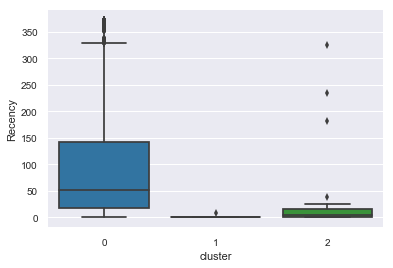

In [64]:
sns.boxplot(rfm_segmentation.cluster,rfm_segmentation.Recency)


<div class="alert alert-block alert-success">
<span style="color:black">

### Cluster 0 has high recency rate which is bad. cluster 1 and cluster 2 having low so they are in race of platinum and gold customer.


</span>

</b>

</div>


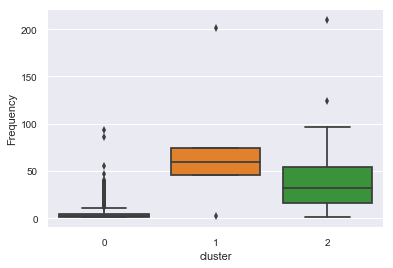

In [65]:
sns.boxplot(rfm_segmentation.cluster,rfm_segmentation.Frequency)

<div class="alert alert-block alert-success">
<span style="color:black">

### Cluster 0 has low frequency rate which is bad. cluster 1 and cluster 2 having high so they are in race of platinum and gold customer.


</span>

</b>

</div>


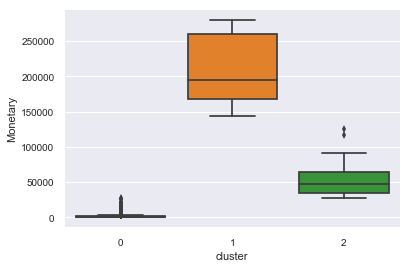

In [66]:
sns.boxplot(rfm_segmentation.cluster,rfm_segmentation.Monetary)

<div class="alert alert-block alert-success">
<span style="color:black">

### Cluster 0 has low Monetary rate which is bad. cluster 1 have highest Montary (money spend) platinum where as cluster 2 have medium level(Gold) and cluster 0 is silver customer.


</span>

</b>

</div>


<div class="alert alert-block alert-success">
<span style="color:black">

<h1 style="color:#1c4526">Based on customer Segmentation we found out
    <ul>
        <li>cluster 1 is Platinum customers</li>
        <li>Cluster 2 is Gold Customers</li>
        <li>Cluster 0 is Silver Customers</li>
    </ul>
</h1>

</span>

</b>

</div>